# Ansatz Routenberechnung (verworfen)

Im Folgenden wird ein Ansatz verfolgt, mit dem ein Gefahrenscore für jede Fahrt (Eintrag in den Citibike Daten) ermittelt werden sollte. Aufgrund des **hohen Rechenaufwands** wurde er jedoch im Rahmen der Challenge nicht weiter verfolgt, **könnte aber generell zur Versicherungskalkulation interessant sein**.

**Idee**:
- Annahme: Die Fahrradfahrer bewegen sich auf den schnellsten Wegen zwischen zwei Stationen. Diese Annahme könnte ggf. über die Zeitdauer der Fahrt und die für die schnellste Route berechnete Zeit validiert werden. Vermutlich trifft die Annahme auf Member eher zu als auf Casual Fahrer, da Member den Service regelmäßig nutzen und vermutlich damit primär von A nach B kommen wollen. Ebenso ergibt die Preisgestaltung einen Anreiz, das Fahrrad schnell abzugeben und bei Bedarf kann schnell ein neues Fahrrad verwendet werden. Unter den Casual Nutzern könnten hingegen auch Touristen sein, die ggf. einfach die Stadt abfahren.

- Mittels Software zur Routenberechnung kann bei den gegebenen Start- und Endpunkten die schnellste Route berechnet werden. Damit lässt sich einerseits der tatsächliche Fahrradverkehr besser einschätzen als durch den Stationstraffic. Andererseits können die gemeldeten Unfälle auf der Route berücksichtigt werden.

- Anhand des Verkehrs und der Unfälle auf einer Route kann für jede Fahrt ein Gefahrenscore bestimmt und dem Datensatz hinzugefügt werden. 

- Damit könnte man ein Modell trainieren, welches anhand der Uhrzeit, der Startstation, der Fahrradart und der Kundenart den Gefahrenscore vorhersagt.  

- Je nach vorhergesagtem Gefahrenscore kann dem Kunden ein unterschiedlicher Versicherungspreis angeboten werden.



Benutzen der OSRM API auf Beispielkoordinaten:

In [1]:
import requests

start_lat, start_lon = 40.858982, -73.923116  
end_lat, end_lon = 40.870000, -73.880000 


url = f"http://router.project-osrm.org/route/v1/bike/{start_lon},{start_lat};{end_lon},{end_lat}?overview=full&geometries=geojson"

response = requests.get(url)
data = response.json()

dauer = data['routes'][0]['duration']
print("Geschätzte Fahrtdauer in Sekunden:", dauer)

Geschätzte Fahrtdauer in Sekunden: 512


In [2]:
data['routes']

[{'geometry': {'coordinates': [[-73.923027, 40.859047],
    [-73.923027, 40.859047],
    [-73.922926, 40.85898],
    [-73.922835, 40.859108],
    [-73.922691, 40.859308],
    [-73.922625, 40.859401],
    [-73.922546, 40.85951],
    [-73.922489, 40.859589],
    [-73.92245, 40.859641],
    [-73.921993, 40.860263],
    [-73.921681, 40.860686],
    [-73.921506, 40.860929],
    [-73.92142, 40.86105],
    [-73.921274, 40.861253],
    [-73.921232, 40.861311],
    [-73.921197, 40.86136],
    [-73.921043, 40.861564],
    [-73.920869, 40.861807],
    [-73.920774, 40.861936],
    [-73.920726, 40.862004],
    [-73.920517, 40.862299],
    [-73.920348, 40.862538],
    [-73.920296, 40.862611],
    [-73.920227, 40.862705],
    [-73.919936, 40.863103],
    [-73.919849, 40.863169],
    [-73.919772, 40.863235],
    [-73.919664, 40.863338],
    [-73.919402, 40.863711],
    [-73.919405, 40.86373],
    [-73.919417, 40.863806],
    [-73.919376, 40.863863],
    [-73.919031, 40.864348],
    [-73.91894, 40.8644

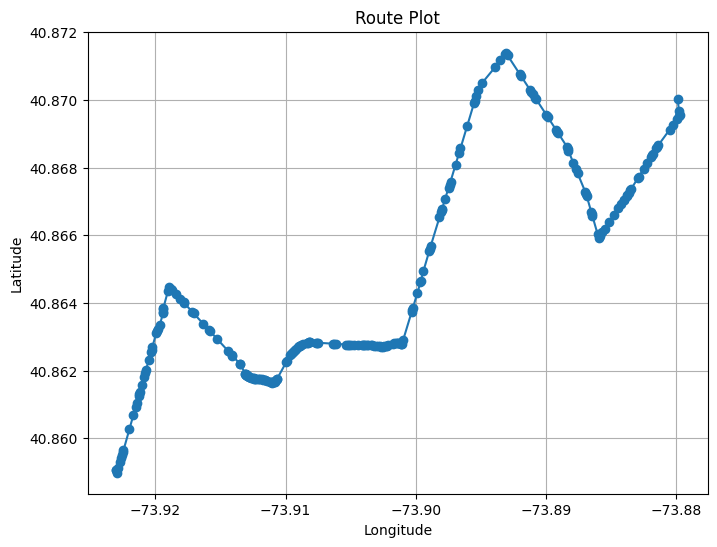

In [3]:
import matplotlib.pyplot as plt

coords = data['routes'][0]['geometry']['coordinates']

lons, lats = zip(*coords)

# Erstelle den Plot
plt.figure(figsize=(8, 6))
plt.plot(lons, lats, marker='o', linestyle='-')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Route Plot")
plt.grid(True)
plt.show()

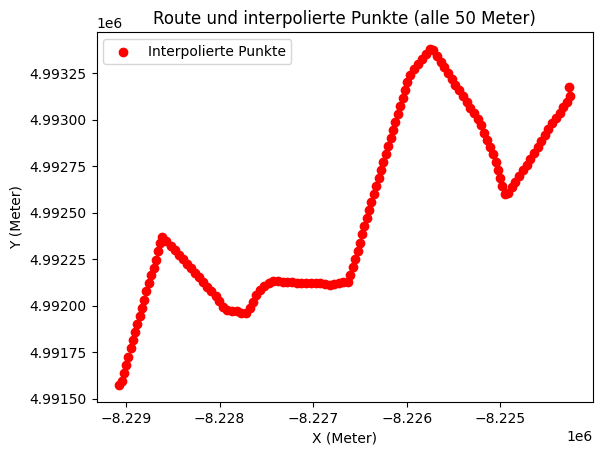

In [4]:
from shapely.geometry import LineString
import pyproj

url = (f"http://router.project-osrm.org/route/v1/cycling/"
       f"{start_lon},{start_lat};{end_lon},{end_lat}"
       "?overview=full&steps=true&geometries=geojson")
response = requests.get(url)
data = response.json()

route_coords = data['routes'][0]['geometry']['coordinates']

transformer = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
projected_coords = [transformer.transform(lon, lat) for lon, lat in route_coords]
projected_line = LineString(projected_coords)

interval = 50 

regular_points = [projected_line.interpolate(distance)
                  for distance in range(0, int(projected_line.length), interval)]

x_points = [point.x for point in regular_points]
y_points = [point.y for point in regular_points]
plt.scatter(x_points, y_points, color='red', label='Interpolierte Punkte')

plt.xlabel("X (Meter)")
plt.ylabel("Y (Meter)")
plt.title("Route und interpolierte Punkte (alle 50 Meter)")
plt.legend()
plt.show()

**Leider hat sich beim Versuch, dies für alle Fahrten im Citibike Datensatz zu berechnen, schnell gezeigt, dass der Rechenaufwand des Ansatzes zu hoch für die Zeit der Challenge ist.**